# Different classification models

In [24]:
#!pip install opendatasets

In [25]:
# !pip install requests
# !pip install tabulate
# !pip install future
# !pip install matplotlib

In [26]:
# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [27]:
# !pip install h2o

In [28]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Skipping, found downloaded files in "./heart-failure-prediction" (use force=True to force download)


In [29]:
!ls

Group_project_HXD220000_MXB220061_KXV220007_MXS220057.Rmd
Group_project_HXD220000_MXB220061_KXV220007_MXS220057.html
HeartDiseaseGroupProject.ipynb
Project Outline.pdf
Research question.docx
ggpairs_data.png
ggpairs_hd_data.png
heart-failure-prediction
heart.csv


In [30]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,30 mins 19 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_harikrishnadev_8xsbso
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.319 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [32]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Axes: >

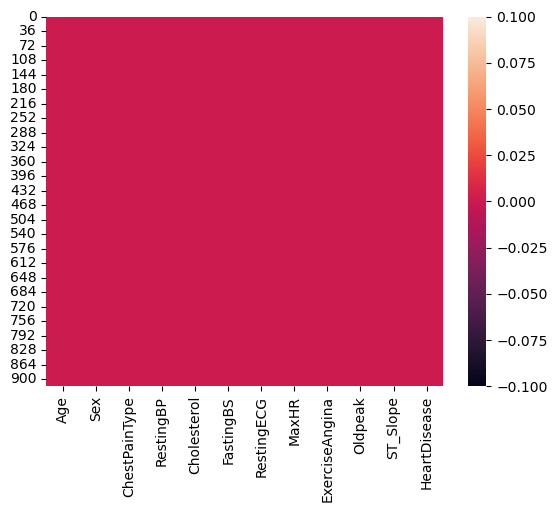

In [34]:
sns.heatmap(df.isnull())

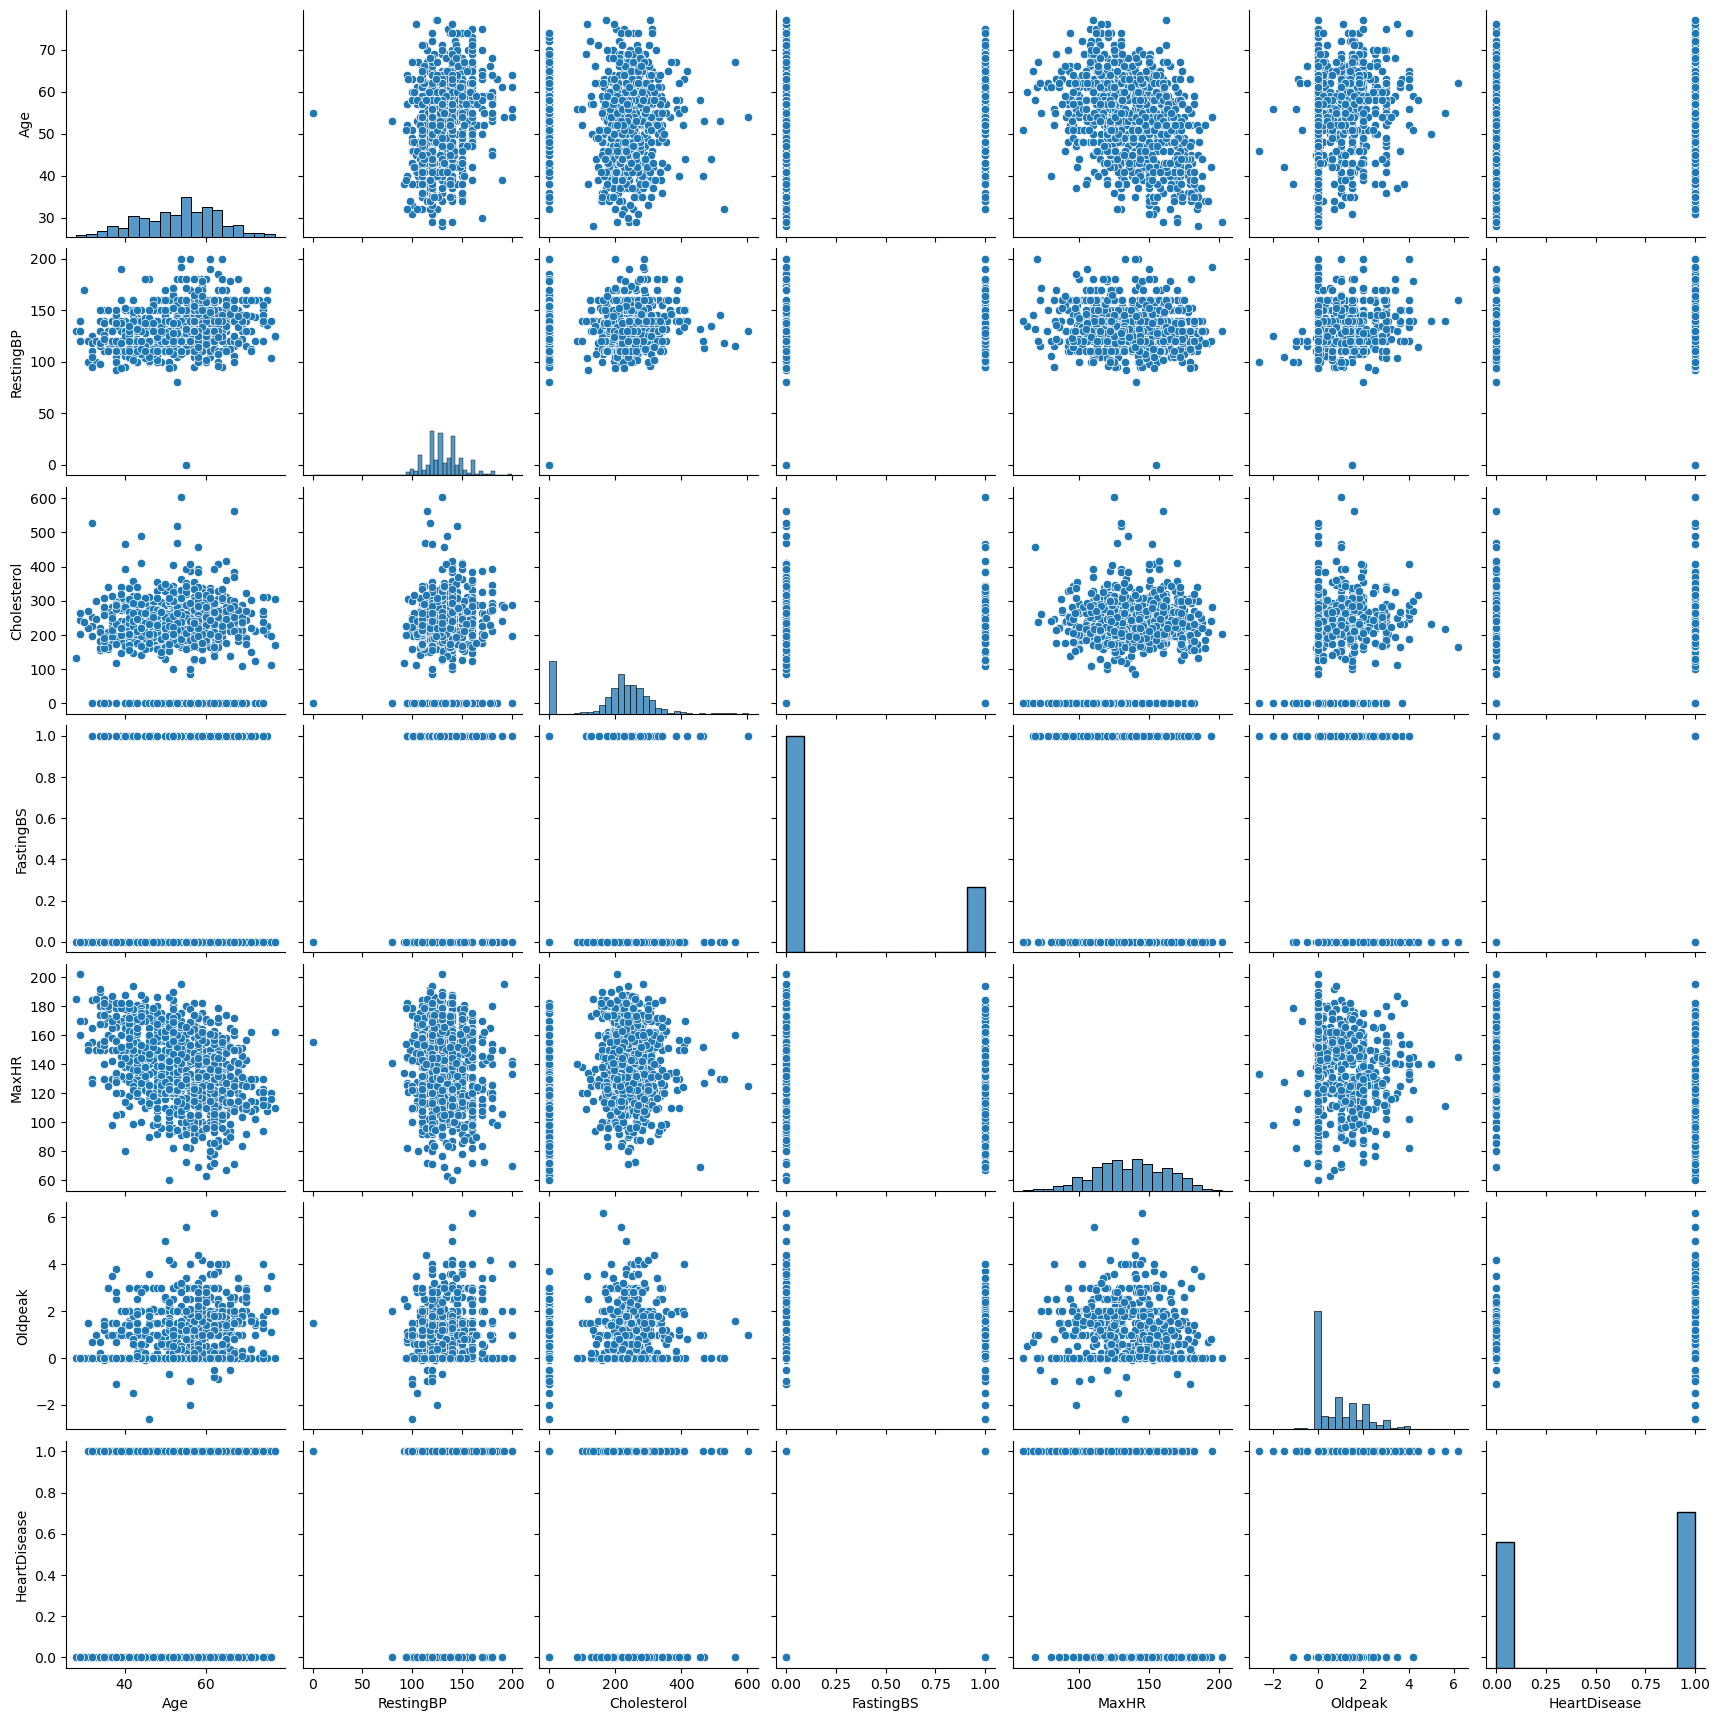

In [35]:
sns.pairplot(df)

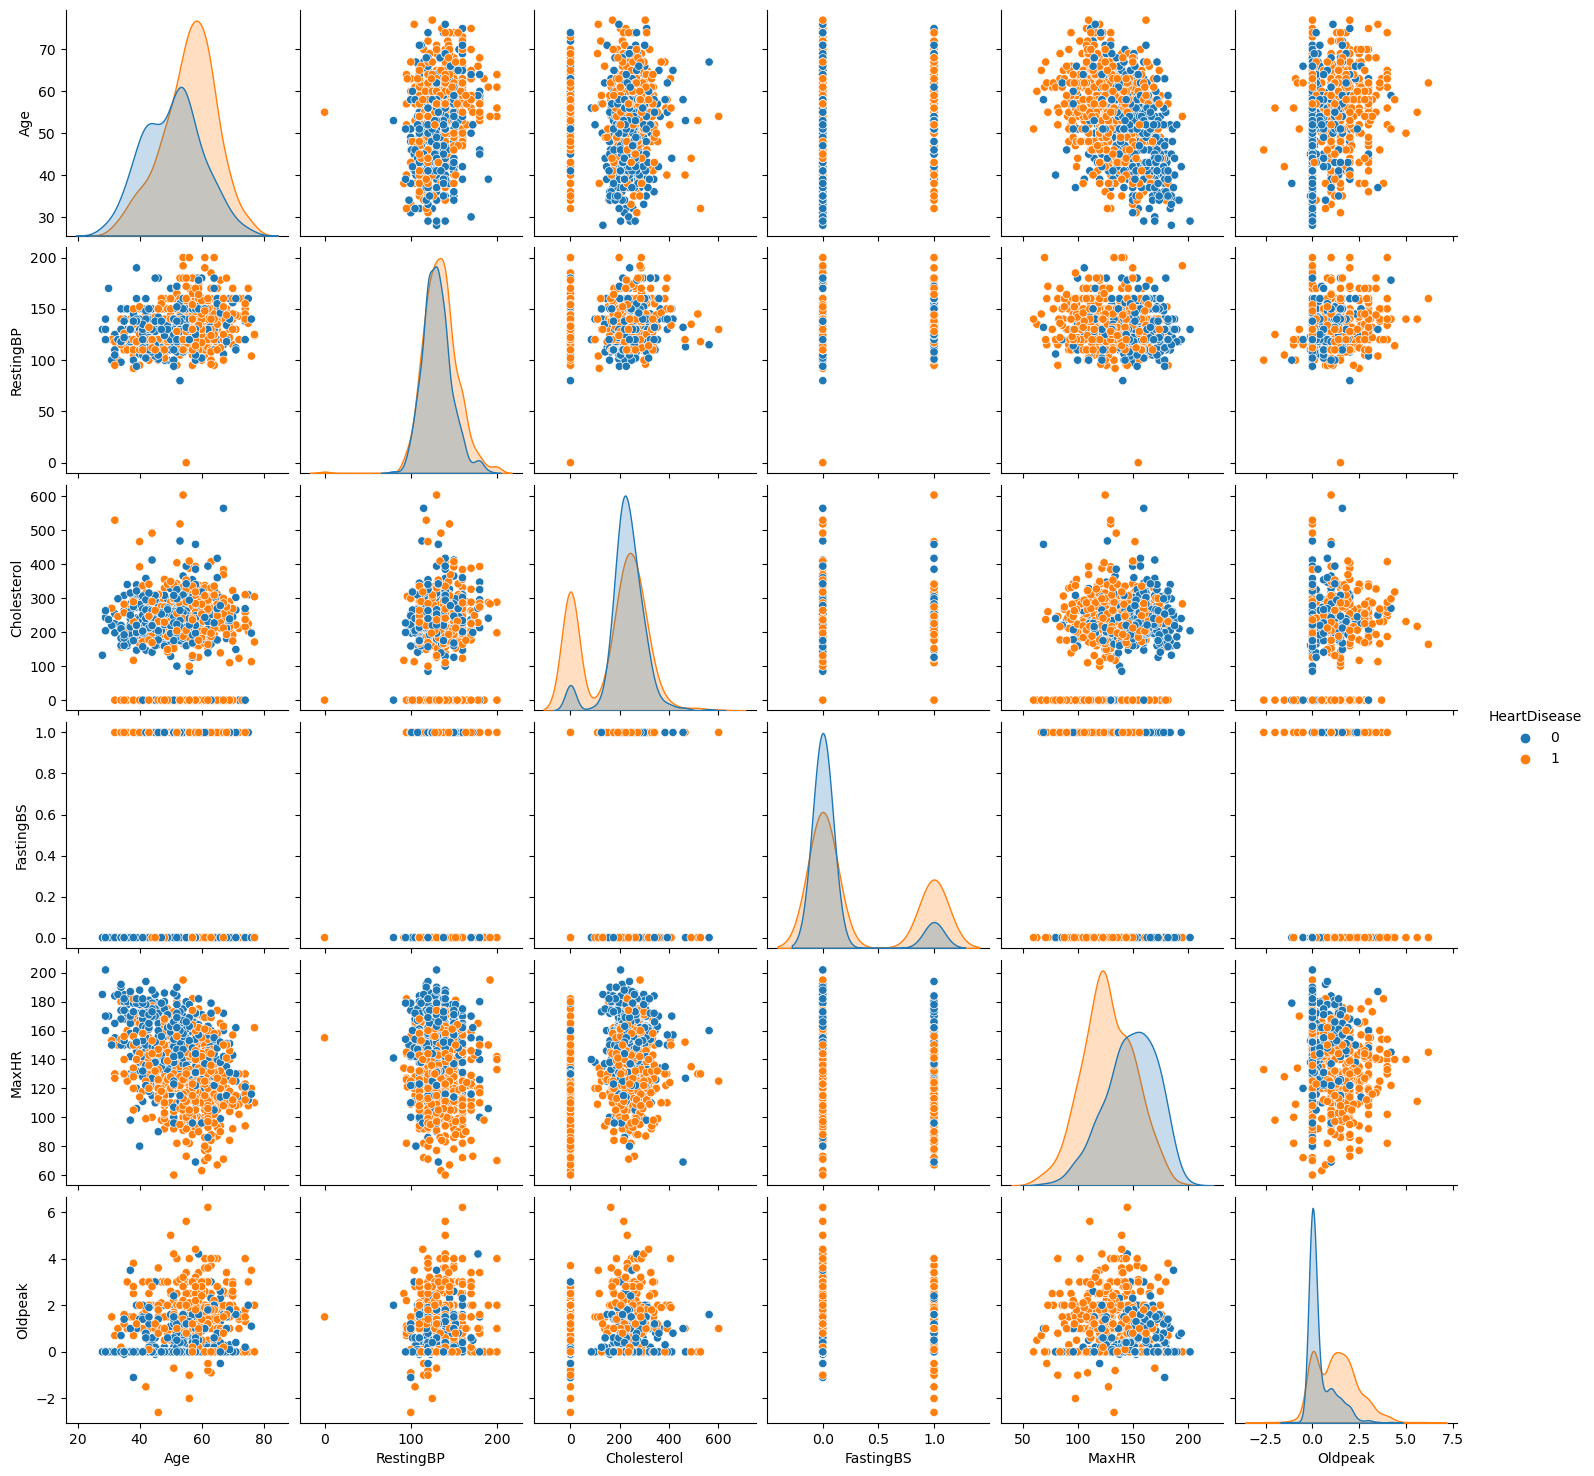

In [36]:
sns.pairplot(df,hue="HeartDisease")

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_83002/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

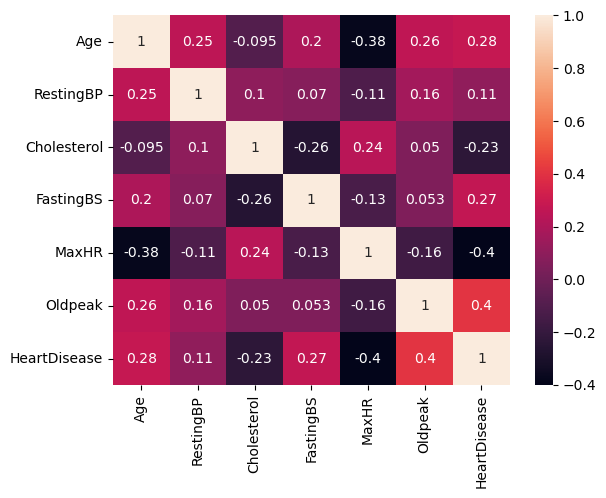

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
categorical_features = ["Sex","ChestPainType", "FastingBS", "RestingECG" ,"ExerciseAngina", "ST_Slope", "HeartDisease"]
numerical_features = ["Age" ,"RestingBP" ,"Cholesterol", "MaxHR" ,"Oldpeak"]

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a fu

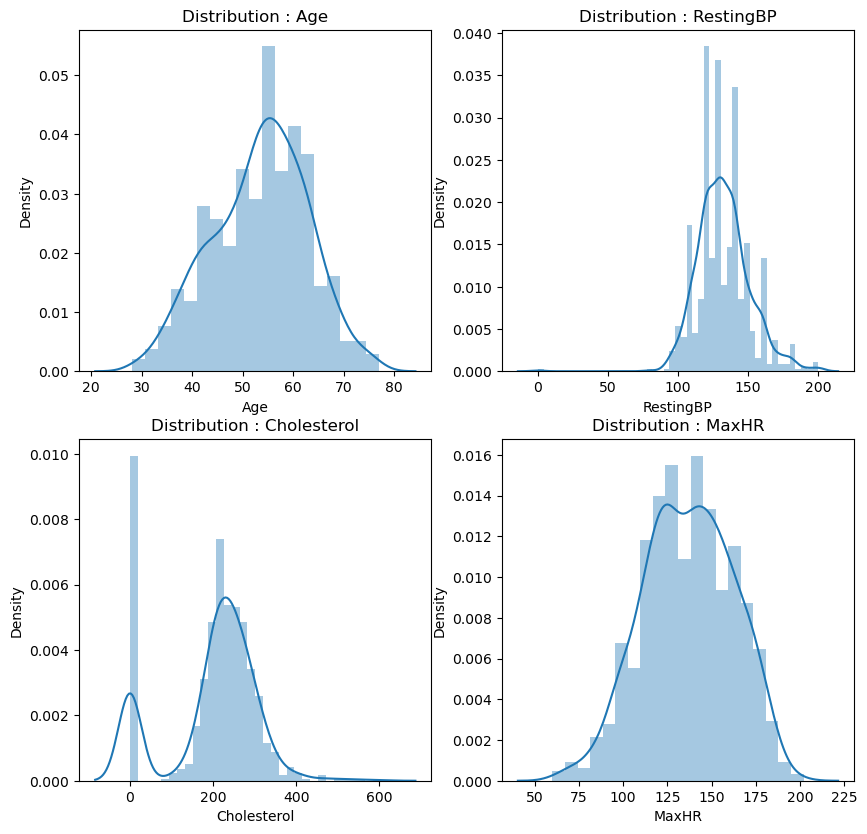

/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


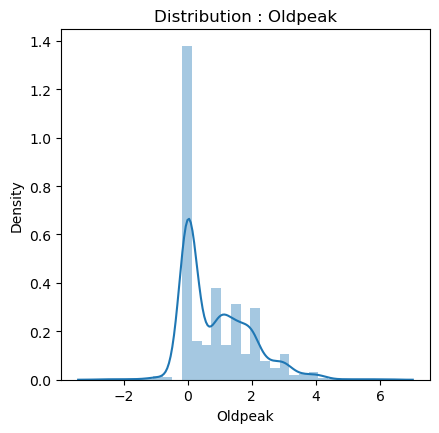

In [40]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

In [41]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_83002/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

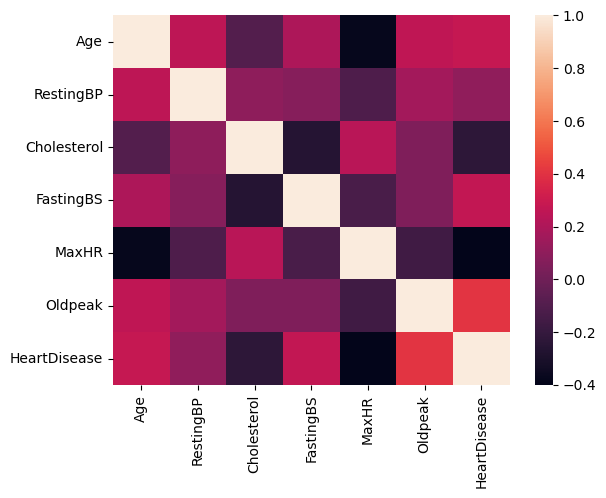

In [42]:
sns.heatmap(df.corr())

In [43]:
from h2o.automl import H2OAutoML

In [44]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [48]:
x = df.columns
y = "HeartDisease"
x = x.remove(y)

In [49]:
x

In [50]:
y

'HeartDisease'

In [59]:
aml = H2OAutoML(max_models=10,balance_classes=True, seed=986875,include_algos = ["GLM", "DeepLearning", "DRF"])
aml.train(y=y, training_frame=train)

AutoML progress: |
22:00:41.388: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


22:00:42.79: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
22:00:42.815: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
22:00:43.864: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
22:00:43.953: DeepLearning_1_AutoML_4_202304

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_4_20230419_220041


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 29                          36482                  11           15           12.9655       81            107           95.4828

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.10389291428905276
RMSE: 0.32232423782435715
MAE: 0.19674240538808824
RMSLE: 0.22686698951388032
Mean Residual Deviance: 0.10389291428905276

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.0982358746214238
RMSE: 0.31342602735162856
MAE: 0.20429853502287945
RMSLE: 0.21952849471653918
Mean Residual Deviance: 0.0982358746214238

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.204841   0.0184679  0.199937      0.228185      0.193405      0.219227      0.183451
mean_residual_deviance  0.0981447  0.0181109  0.0922341     0.124001      0.0839596     0.109242      0.0812872
mse                     0.0981447  0.0181109  0.0922341     0.124001      0.0839596     0.109242      0.0812872
r2                      0.603436   0.0722357  0.630787      0.497967      0.653162      0.562294      0.672969
residual_deviance       0.0981447  0.0181109  0.0922341     0.124001      0.0839596     0.109242      0.0812872
rmse                    0.312244   0.028462   0.303701      0.352138      0.289758      0.330517      0.285109
rmsle                   0.218498   0.0218911  0.217539      0.243569      0.190932      0.236373      0.204075

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-04-19 22:00:42  0.586 sec   0                  nan              nan             nan
    2023-04-19 22:00:42  0.612 sec   5                  0.412558         0.216944        0.170204
    2023-04-19 22:00:42  0.634 sec   10                 0.363684         0.203165        0.132266
    2023-04-19 22:00:42  0.656 sec   15                 0.347568         0.201723        0.120803
    2023-04-19 22:00:42  0.680 sec   20                 0.329409         0.197039        0.10851
    2023-04-19 22:00:42  0.703 sec   25                 0.326307         0.199284        0.106477
    2023-04-19 22:00:42  0.722 sec   29                 0.322324         0.196742        0.103893

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
ST_Slope        1110.53                1                    0.290569
ChestPainType   545.907                0.491572             0.142836
Oldpeak         386.915                0.348405             0.101236
Cholesterol     359.227                0.323473             0.0939912
MaxHR           337.671                0.304062             0.0883511
ExerciseAngina  284.487                0.256171             0.0744354
Age             269.282                0.242479             0.070457
RestingBP       212.639                0.191475             0.0556367
Sex             140.128                0.126181             0.0366643
RestingECG      103.948                0.0936017            0.0271978
FastingBS       71.1866                0.0641013            0.0186259

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user

In [62]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DRF_1_AutoML_4_20230419_220041,0.313426,0.0982359,0.204299,0.219528,0.0982359
GLM_1_AutoML_4_20230419_220041,0.330851,0.109462,0.247909,0.231655,0.109462
XRT_1_AutoML_4_20230419_220041,0.333636,0.111313,0.23991,0.231703,0.111313


In [63]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_4_20230419_220041


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 29                          36482                  11           15           12.9655       81            107           95.4828

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.10389291428905276
RMSE: 0.32232423782435715
MAE: 0.19674240538808824
RMSLE: 0.22686698951388032
Mean Residual Deviance: 0.10389291428905276

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.0982358746214238
RMSE: 0.31342602735162856
MAE: 0.20429853502287945
RMSLE: 0.21952849471653918
Mean Residual Deviance: 0.0982358

In [64]:
aml.leader

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_4_20230419_220041


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 29                          36482                  11           15           12.9655       81            107           95.4828

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.10389291428905276
RMSE: 0.32232423782435715
MAE: 0.19674240538808824
RMSLE: 0.22686698951388032
Mean Residual Deviance: 0.10389291428905276

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.0982358746214238
RMSE: 0.31342602735162856
MAE: 0.20429853502287945
RMSLE: 0.21952849471653918
Mean Residual Deviance: 0.0982358746214238

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.204841   0.0184679  0.199937      0.228185      0.193405      0.219227      0.183451
mean_residual_deviance  0.0981447  0.0181109  0.0922341     0.124001      0.0839596     0.109242      0.0812872
mse                     0.0981447  0.0181109  0.0922341     0.124001      0.0839596     0.109242      0.0812872
r2                      0.603436   0.0722357  0.630787      0.497967      0.653162      0.562294      0.672969
residual_deviance       0.0981447  0.0181109  0.0922341     0.124001      0.0839596     0.109242      0.0812872
rmse                    0.312244   0.028462   0.303701      0.352138      0.289758      0.330517      0.285109
rmsle                   0.218498   0.0218911  0.217539      0.243569      0.190932      0.236373      0.204075

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-04-19 22:00:42  0.586 sec   0                  nan              nan             nan
    2023-04-19 22:00:42  0.612 sec   5                  0.412558         0.216944        0.170204
    2023-04-19 22:00:42  0.634 sec   10                 0.363684         0.203165        0.132266
    2023-04-19 22:00:42  0.656 sec   15                 0.347568         0.201723        0.120803
    2023-04-19 22:00:42  0.680 sec   20                 0.329409         0.197039        0.10851
    2023-04-19 22:00:42  0.703 sec   25                 0.326307         0.199284        0.106477
    2023-04-19 22:00:42  0.722 sec   29                 0.322324         0.196742        0.103893

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
ST_Slope        1110.53                1                    0.290569
ChestPainType   545.907                0.491572             0.142836
Oldpeak         386.915                0.348405             0.101236
Cholesterol     359.227                0.323473             0.0939912
MaxHR           337.671                0.304062             0.0883511
ExerciseAngina  284.487                0.256171             0.0744354
Age             269.282                0.242479             0.070457
RestingBP       212.639                0.191475             0.0556367
Sex             140.128                0.126181             0.0366643
RestingECG      103.948                0.0936017            0.0271978
FastingBS       71.1866                0.0641013            0.0186259

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user

In [65]:
best_model.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.1165514065691811
RMSE: 0.3413962603327416
MAE: 0.22783294671089888
RMSLE: 0.23480364252943217
Mean Residual Deviance: 0.1165514065691811

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_4_20230419_220041,0.332019,0.110237,0.247661,0.232675,0.110237,44,0.106452,GLM
DRF_1_AutoML_4_20230419_220041,0.341396,0.116551,0.227833,0.234804,0.116551,138,0.041934,DRF
XRT_1_AutoML_4_20230419_220041,0.357121,0.127536,0.259487,0.248395,0.127536,284,0.045155,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

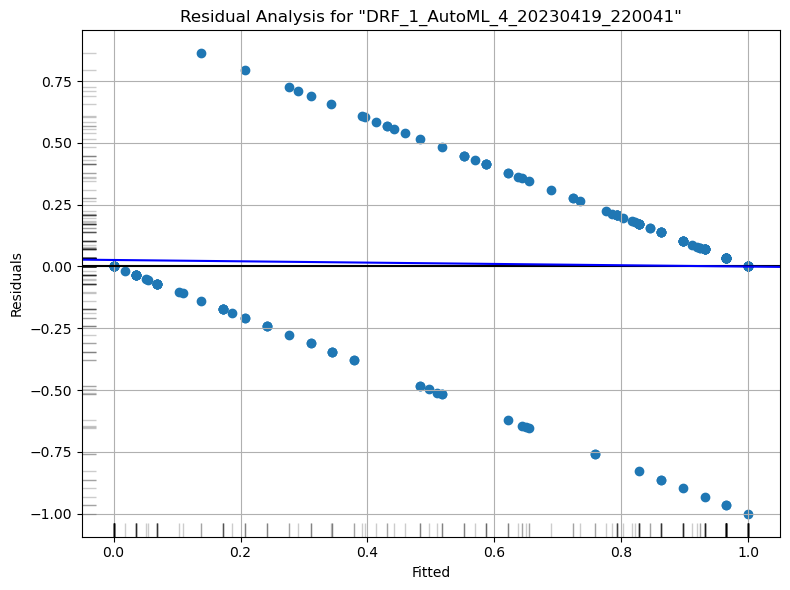

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

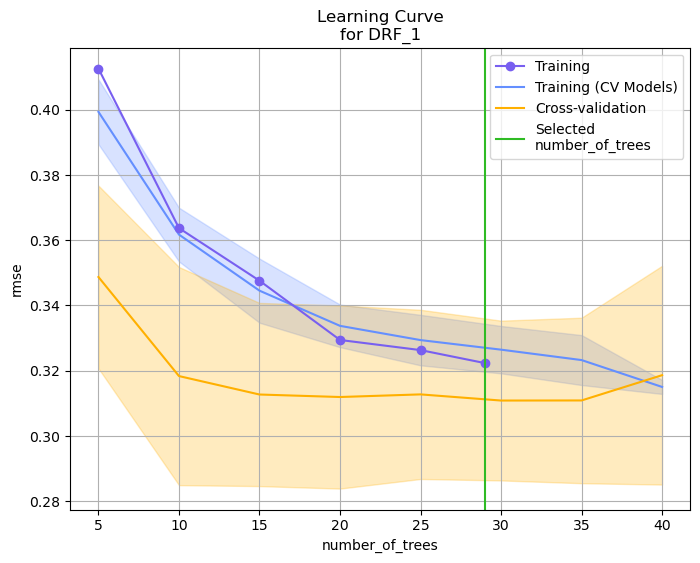

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

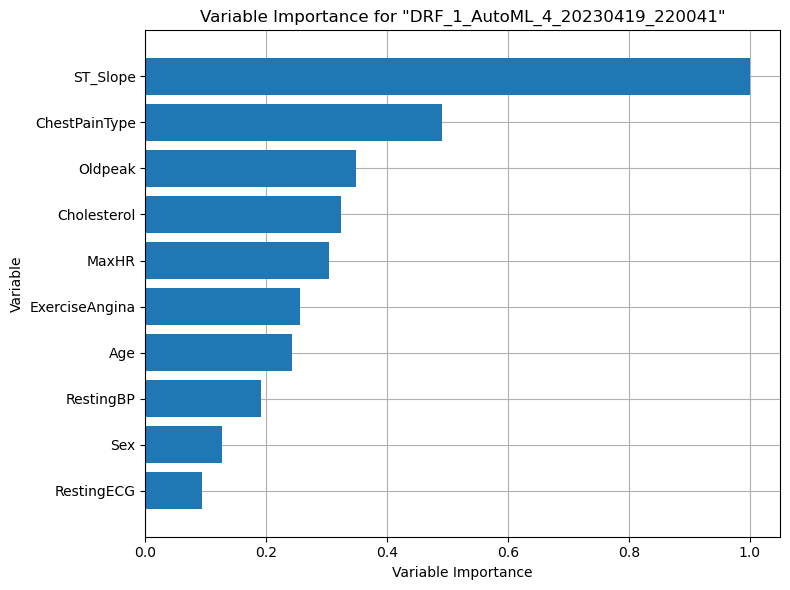

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

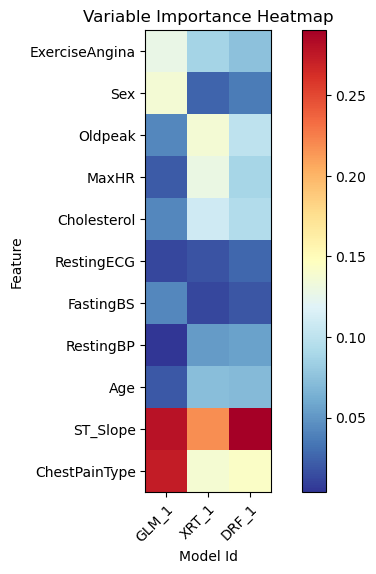

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

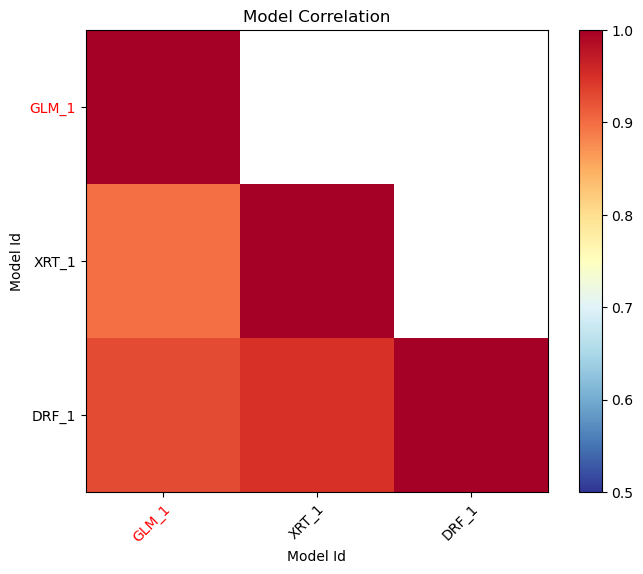

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

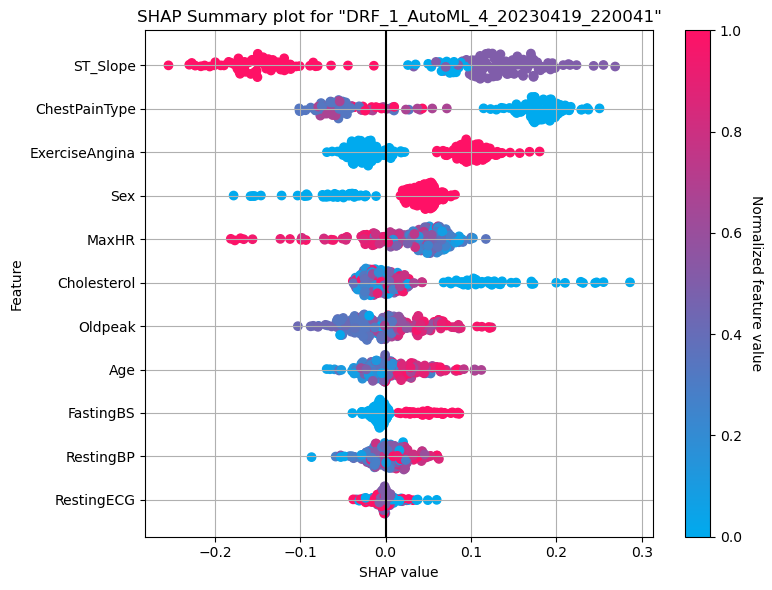

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

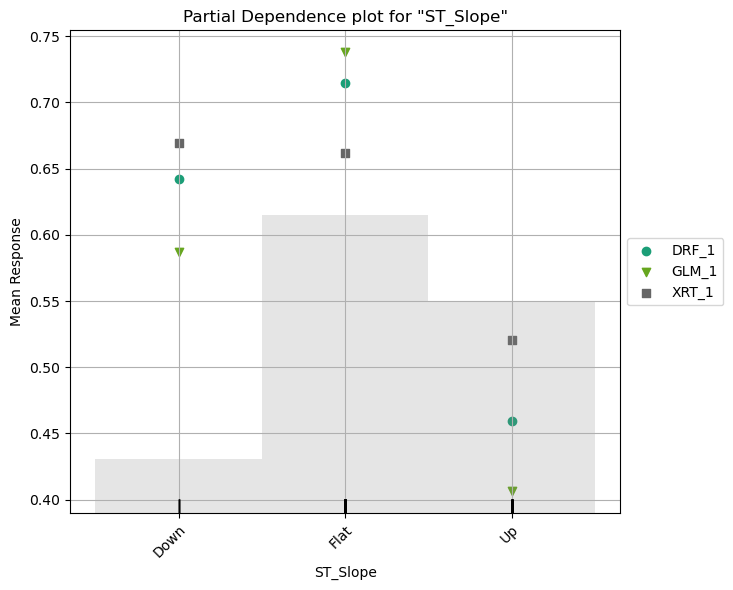

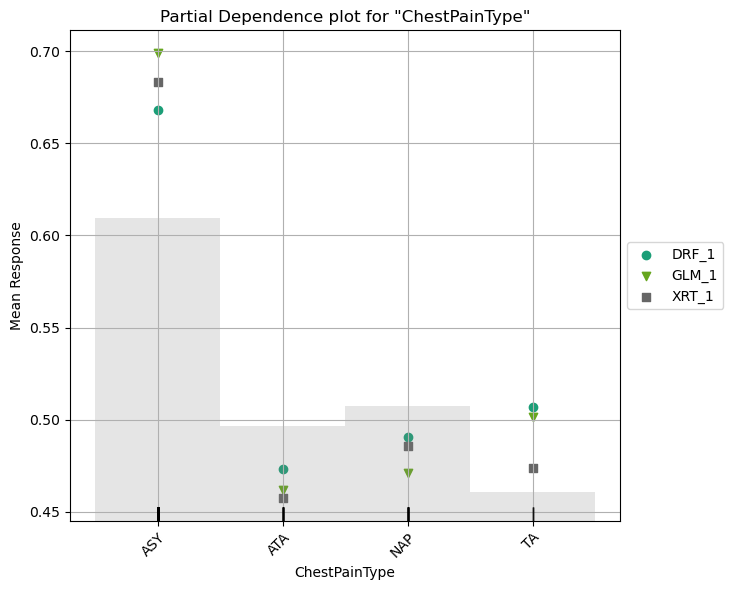

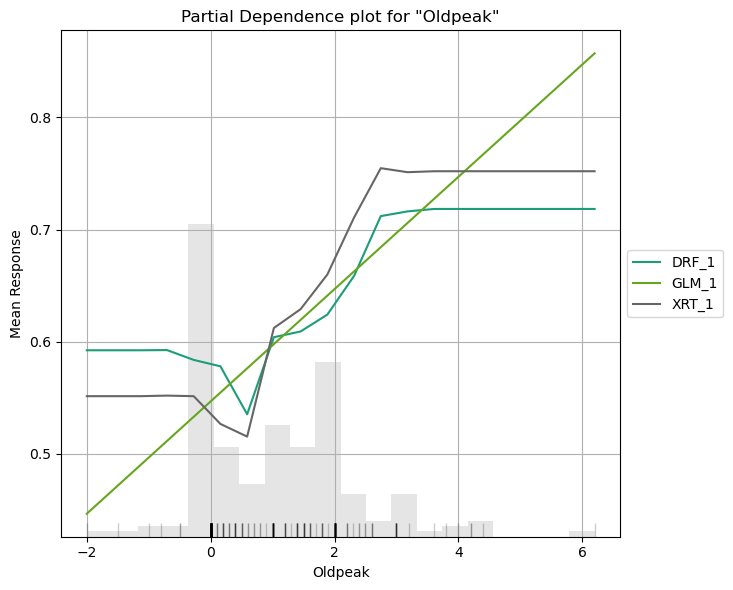

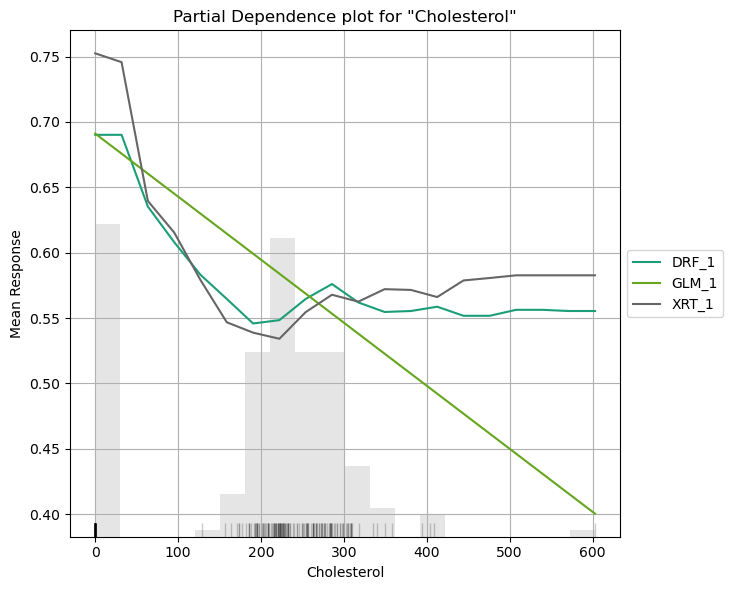

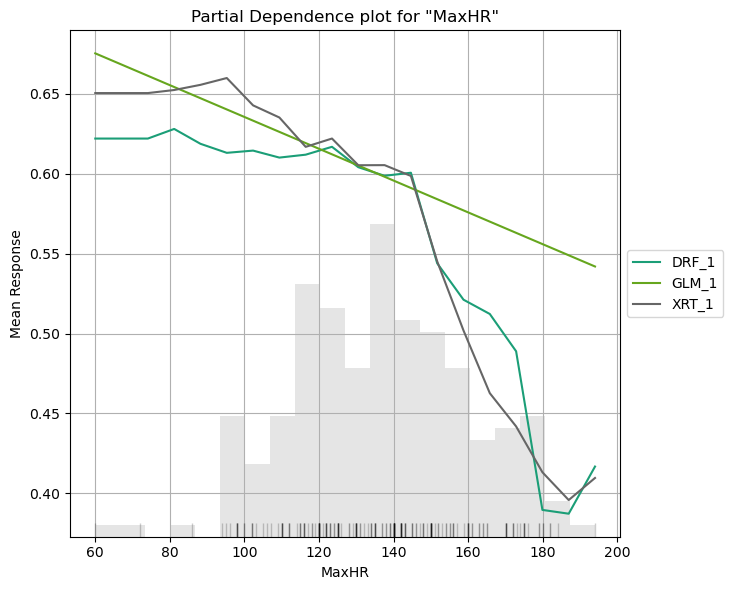

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

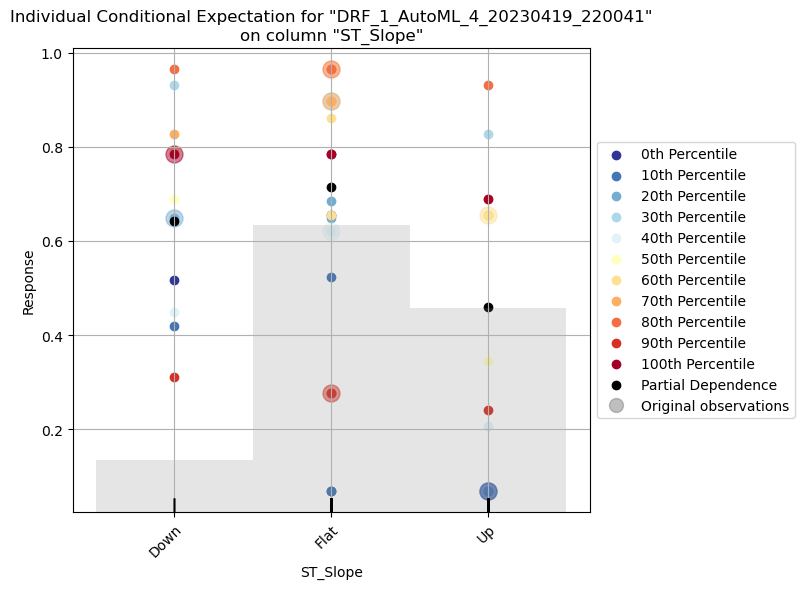

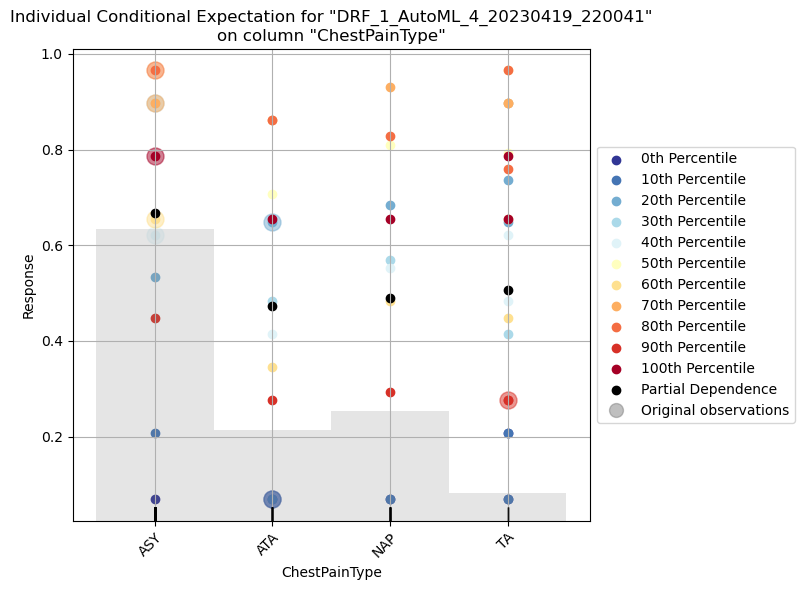

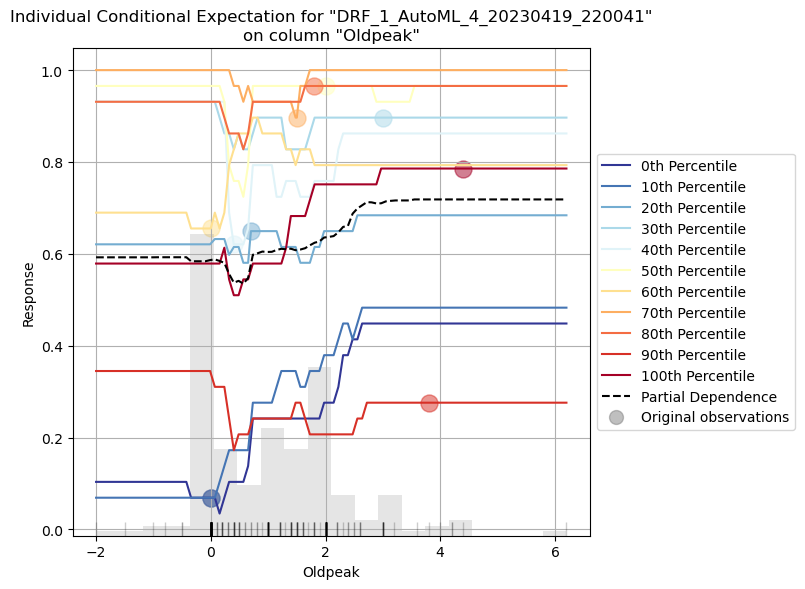

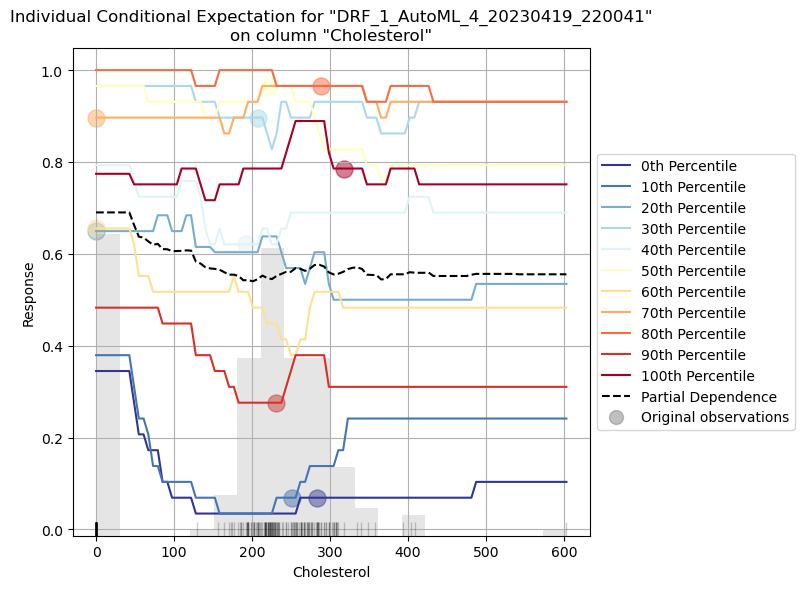

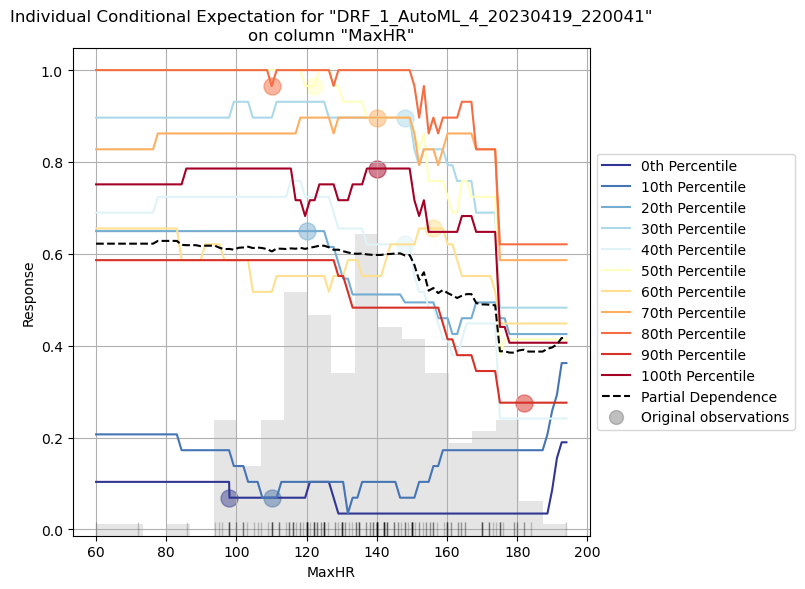

In [66]:
explain_model = aml.explain(frame = test, figsize = (8,6))

In [67]:
preds = aml.leader.predict(test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [68]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_4_20230419_220041,0.313426,0.0982359,0.204299,0.219528,0.0982359,138,0.018534,DRF
GLM_1_AutoML_4_20230419_220041,0.330851,0.109462,0.247909,0.231655,0.109462,44,0.012071,GLM
XRT_1_AutoML_4_20230419_220041,0.333636,0.111313,0.23991,0.231703,0.111313,284,0.020584,DRF


In [70]:
m = aml.get_best_model()

In [71]:
m.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'mtries', 'sample_rate', 'sample_rate_per_class', 'binomial_double_trees', 'checkpoint', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'categorical_encoding', 'calibrate_model', 'calibration_frame', 'calibration_method', 'distribution', 'custom_metric_func', 'export_checkpoints_d

In [76]:
m.params['model_id']

{'default': None,
 'actual': {'__meta': {'schema_version': 3,
   'schema_name': 'ModelKeyV3',
   'schema_type': 'Key<Model>'},
  'name': 'DRF_1_AutoML_4_20230419_220041',
  'type': 'Key<Model>',
  'URL': '/3/Models/DRF_1_AutoML_4_20230419_220041'},
 'input': None}

In [75]:
info = aml.training_info
info

{'creation_epoch': '1681959641',
 'start_epoch': '1681959641',
 'start_GLM_def_1': '1681959641',
 'start_DRF_def_1': '1681959642',
 'start_DRF_XRT': '1681959643',
 'start_DeepLearning_def_1': '1681959644',
 'start_DeepLearning_grid_1': '1681959644',
 'start_DeepLearning_grid_2': '1681959644',
 'start_DeepLearning_grid_3': '1681959644',
 'stop_epoch': '1681959645',
 'duration_secs': '3'}

In [82]:
info = aml.training_info
info

{'creation_epoch': '1681959641',
 'start_epoch': '1681959641',
 'start_GLM_def_1': '1681959641',
 'start_DRF_def_1': '1681959642',
 'start_DRF_XRT': '1681959643',
 'start_DeepLearning_def_1': '1681959644',
 'start_DeepLearning_grid_1': '1681959644',
 'start_DeepLearning_grid_2': '1681959644',
 'start_DeepLearning_grid_3': '1681959644',
 'stop_epoch': '1681959645',
 'duration_secs': '3'}